In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Loading train and test data

In [2]:
train = pd.read_csv("../dataset/train_1.csv").drop("Unnamed: 0",1)
test = pd.read_csv("../dataset/test_1.csv").drop("Unnamed: 0",1)

### Splitting data

In [3]:
# Splitting data

Y = train["churn"]    
X = train.drop("churn", 1) 

### Training model - Logistic Regression

In [4]:
model = LogisticRegression(max_iter= 10000)
fit = model.fit(X, Y)

### Predictions

In [5]:
prediction = fit.predict(test.drop("churn", 1))

### Confusion Matrix

In [6]:
pd.DataFrame(confusion_matrix(test["churn"], prediction), columns = ["yes_true","no_true"], index = ["yes_pred","no_pred"])

,yes_true,no_true
yes_pred,1082,361
no_pred,36,188


### Accuracy

In [7]:
print("Model's accuracy: " + str(100*round(accuracy_score(test["churn"], prediction),4)) + "%")

Model's accuracy: 76.18%


### Gradient Boosting model

In [21]:
model = GradientBoostingClassifier(n_estimators = 1000, max_depth = 5)
fit = model.fit(X, Y)
prediction = fit.predict(test.drop("churn", 1))
print("Model's accuracy: " + str(100*round(accuracy_score(test["churn"], prediction),2)) + "%")
pd.DataFrame(confusion_matrix(test["churn"], prediction), columns = ["yes_true","no_true"], index = ["yes_pred","no_pred"])

Model's accuracy: 90.0%


,yes_true,no_true
yes_pred,1305,138
no_pred,36,188


### Feature importance

Text(0.5, 1.0, 'Feature Importance (MDI)')

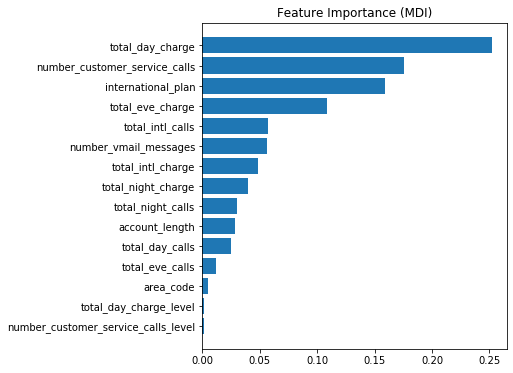

In [14]:
feature_importance = fit.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')